Tarefa: Linguística Forense
Seu grupo de especialistas em PLN foi chamado para periciar um livro escrito por um autor incógnito. Há três elementos suspeitos de ser o autor da obra. Todos negam veementemente a autoria, mas sabe-se que o autor é um deles. Os suspeitos são:

Machado de Assis, autor de "Dom Casmurro"
José de Alencar, autor de "O Guarani"
Joaquim Nabuco, autor de "O Abolicionismo"
Você tem à disposição esses três livros para comparar com o livro apócrifo.

Em suas análises, use alguns dos recursos comuns da Linguística Forense:

Análise das divisões de período. Você pode usar somente o tamanho das sentenças, para simplificar, mas uma análise mais completa incluiria todos os delimitadores (vírgula, ponto-e-vírgula, dois pontos, travessão, parênteses...);
Comparação das colocações adverbiais, em especial os modais (etiqueta de dependência: "advmod") e as conjunções subordinativas ("que" e "se"; etiqueta: "sconj").
A solução do problema deve ser representada num gráfico com duas ou três dimensões, em que cada dimensão expressa uma métrica de comparação, como divisão de período / advérbios modais, por exemplo.

Ao final, responda: quem é o autor do livro apócrifo?

Nome: Anderson Alves Schinaid

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
path = '/content/drive/MyDrive/PECE/Processamento Linguagem Natural/data/'
advmod_list = ["talvez", "provavelmente", "certamente", "realmente", "obviamente", "possivelmente"]

In [56]:
def load_texts(file_paths):
    """
    Carrega os textos dos arquivos fornecidos.

    Args:
    file_paths (dict): Dicionário contendo o nome do autor como chave e o caminho do arquivo como valor.

    Returns:
    dict: Dicionário com o nome do autor como chave e o texto do arquivo como valor.
    """
    texts = {}
    for author, filepath in file_paths.items():
        if os.path.exists(filepath):
            with open(filepath, "r", encoding="utf-8") as f:
                texts[author] = f.read()
        else:
            print(f"Arquivo não encontrado: {filepath}")
    return texts

In [57]:
def clean_text(text):
    """
    Limpa o texto removendo espaços e quebras de linha desnecessárias.

    Args:
    text (str): Texto a ser limpo.

    Returns:
    str: Texto limpo.
    """
    return re.sub(r"\s+", " ", text)

In [58]:
def split_sentences(text):
    """
    Divide o texto em sentenças.

    Args:
    text (str): Texto a ser dividido.

    Returns:
    list: Lista de sentenças.
    """
    return [sentence.strip() for sentence in re.split(r'[.!?]', text) if sentence]

In [59]:
def count_adverbs(text, list):
    """
    Conta a ocorrência de advérbios modais mais comuns.

    Args:
    text (str): Texto a ser analisado.

    Returns:
    int: Contagem de advérbios modais.
    """
    advmod_list = list
    return sum(text.lower().count(word) for word in advmod_list)

In [60]:
def count_subordinating_conjunctions(text):
    """
    Conta a ocorrência das conjunções subordinativas "que" e "se".

    Args:
    text (str): Texto a ser analisado.

    Returns:
    int: Contagem de conjunções subordinativas.
    """
    return text.lower().count(" que ") + text.lower().count(" se ")

In [61]:
def analyze_text(text):
    """
    Analisa um texto e retorna métricas linguísticas.

    Args:
    text (str): Texto a ser analisado.

    Returns:
    tuple: Contém três métricas:
        - Média do tamanho das sentenças.
        - Contagem de advérbios modais.
        - Contagem de conjunções subordinativas.
    """
    text = clean_text(text)
    sentences = split_sentences(text)
    avg_sentence_length = np.mean([len(sentence.split()) for sentence in sentences]) if sentences else 0
    advmod_count = count_adverbs(text, advmod_list)
    sconj_count = count_subordinating_conjunctions(text)

    return avg_sentence_length, advmod_count, sconj_count

In [62]:
def process_analysis(texts):
    """
    Processa a análise linguística dos textos carregados.

    Args:
    texts (dict): Dicionário contendo os textos com o nome do autor como chave.

    Returns:
    pd.DataFrame: DataFrame contendo as métricas linguísticas analisadas.
    """
    analysis_results = {author: analyze_text(text) for author, text in texts.items()}
    return pd.DataFrame.from_dict(analysis_results, orient="index",
                                  columns=["Tamanho Médio da Sentença", "Advérbios Modais", "Conjunções Subordinativas"])

In [63]:
def plot_comparison(df):
    """
    Gera um gráfico de dispersão comparando os autores com base nas métricas linguísticas.

    Args:
    df (pd.DataFrame): DataFrame contendo os resultados da análise linguística.
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plotando os pontos representando os autores analisados
    for author in df.index:
        ax.scatter(df.loc[author, "Tamanho Médio da Sentença"],
                   df.loc[author, "Advérbios Modais"],
                   label=author, s=100)

    # Configuração dos rótulos e título do gráfico
    ax.set_xlabel("Tamanho Médio da Sentença")
    ax.set_ylabel("Quantidade de Advérbios Modais")
    ax.set_title("Comparação Linguística dos Autores")
    ax.legend()
    plt.grid()
    plt.show()


In [64]:
def run_analysis(file_paths):
    """
    Executa todo o processo de análise linguística, desde o carregamento dos textos até a visualização dos resultados.

    Args:
    file_paths (dict): Dicionário contendo os caminhos dos arquivos de texto dos autores.
    """
    # Carregar os textos
    texts = load_texts(file_paths)

    # Processar a análise dos textos
    df_results = process_analysis(texts)

    # Exibir os resultados de forma alternativa
    print("\nResultados da Análise:\n")
    print(df_results)

    # (Opcional) Salvar os resultados em CSV para visualização posterior
    df_results.to_csv("analise_resultados.csv", index=True, encoding="utf-8")

    # Gerar e exibir o gráfico comparativo
    plot_comparison(df_results)



Resultados da Análise:

                  Tamanho Médio da Sentença  Advérbios Modais  \
Machado de Assis                  14.384888                78   
José de Alencar                   16.925238                 8   
Joaquim Nabuco                    31.977410                37   

                  Conjunções Subordinativas  
Machado de Assis                       3106  
José de Alencar                        1402  
Joaquim Nabuco                         2697  


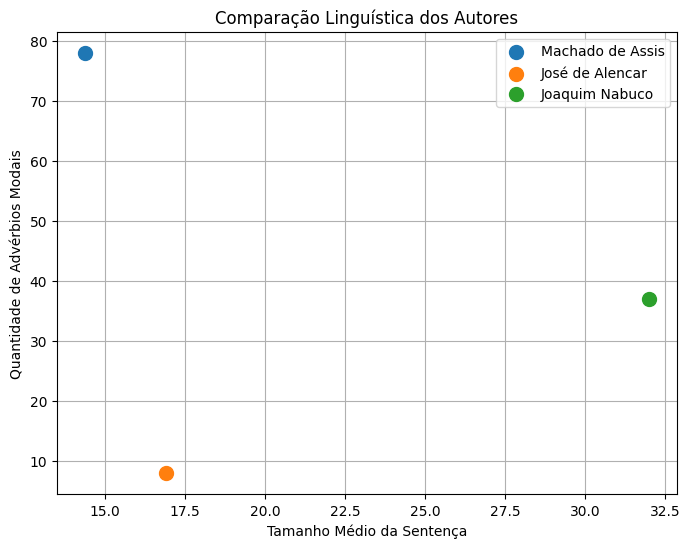

In [66]:
# Executar a análise completa
run_analysis(file_paths)